In [77]:
setwd('/import/hd/')

In [78]:
sce1 = readRDS('./OA7.rds')

In [79]:
sce1@images$image = sce1@images$slice1

In [80]:
sce1@meta.data$orig.ident = 'OA7'

In [81]:
sce2 = readRDS('./N2.rds')

In [82]:
sce2@images$slice1 = sce2@images$image

In [83]:
sce1@images$image = NULL
sce2@images$image = NULL

In [84]:
library(Seurat)

In [215]:
data.merge <- merge(sce1, sce2)
DefaultAssay(data.merge) <- "Spatial"

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [216]:
VariableFeatures(data.merge) <- c(VariableFeatures(sce1), VariableFeatures(sce2))

In [217]:
seo = data.merge

In [218]:
table(seo$orig.ident)


  N2  OA7 
1308 2982 

In [219]:
brain =  SplitObject(seo, split.by = "orig.ident")

In [220]:
for (i in 1:length(brain)) {
   brain[[i]] <- NormalizeData(brain[[i]]) #未使用SCT标准化
    brain[[i]] <- FindVariableFeatures(brain[[i]], selection.method = "vst", nfeatures = 2000)}
#
features <- SelectIntegrationFeatures(object.list = brain)
brain.anchors <- FindIntegrationAnchors(object.list = brain, anchor.features = features)
brain_in <- IntegrateData(anchorset = brain.anchors)
dim(brain_in)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5389 anchors

Filtering anchors

	Retained 3075 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



[1] 2000 4290

In [221]:
DefaultAssay(brain_in) <- "integrated"
brain_in <- ScaleData(brain_in, verbose = FALSE)
brain_in <- RunPCA(brain_in, npcs = 30, verbose = FALSE)
brain_in <- RunUMAP(brain_in, reduction = "pca", dims = 1:30)
brain_in <- FindNeighbors(brain_in, reduction = "pca", dims = 1:30)
brain_in <- FindClusters(brain_in, resolution = 0.6,verbose = FALSE)

05:27:30 UMAP embedding parameters a = 0.9922 b = 1.112

05:27:30 Read 4290 rows and found 30 numeric columns

05:27:30 Using Annoy for neighbor search, n_neighbors = 30

05:27:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:27:31 Writing NN index file to temp file /tmp/RtmpXiO2oN/file3941c1e8c0525

05:27:31 Searching Annoy index using 1 thread, search_k = 3000

05:27:32 Annoy recall = 100%

05:27:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

05:27:33 Initializing from normalized Laplacian + noise (using irlba)

05:27:33 Commencing optimization for 500 epochs, with 187030 positive edges

05:27:44 Optimization finished

Computing nearest neighbor graph

Computing SNN



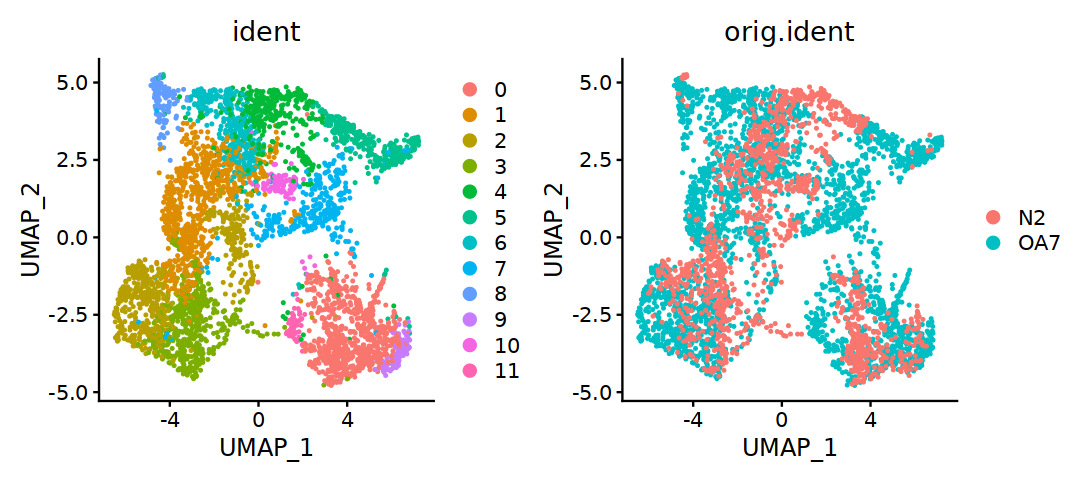

In [222]:
DimPlot(brain_in, reduction = "umap", group.by = c("ident", "orig.ident"))

In [223]:
Idents(brain_in) = 'seurat_clusters'

In [224]:
brain_in@images$slice1.1 =NULL
brain_in@images$slice1.2 =NULL

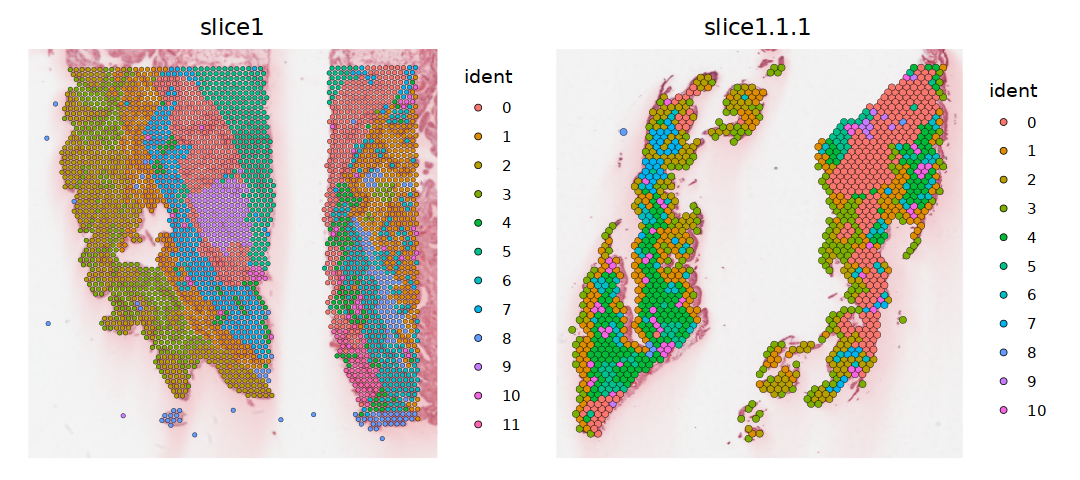

In [225]:
SpatialDimPlot(brain_in)

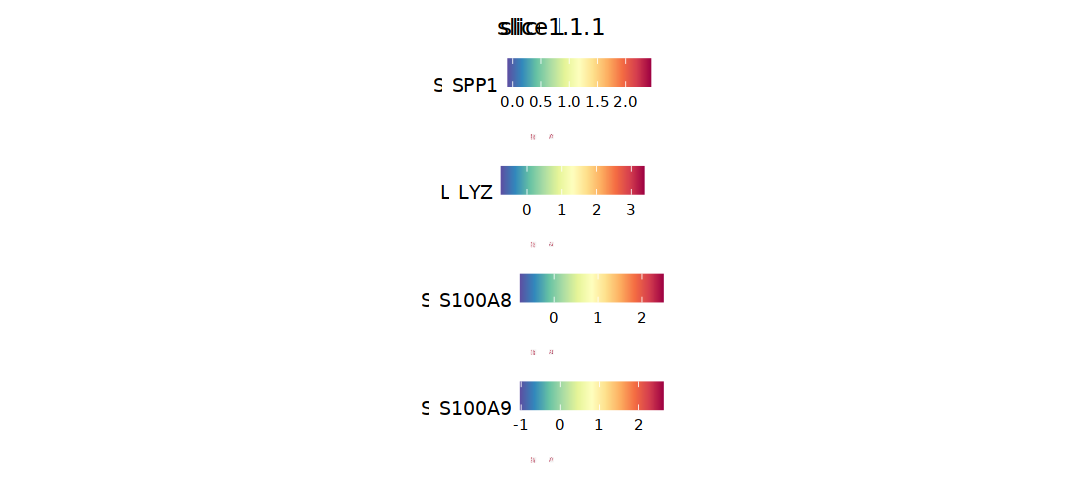

In [226]:
SpatialFeaturePlot(brain_in, features = c("SPP1",'LYZ','S100A8','S100A9'))

In [227]:
options(repr.plot.height = 4,repr.plot.width = 9)

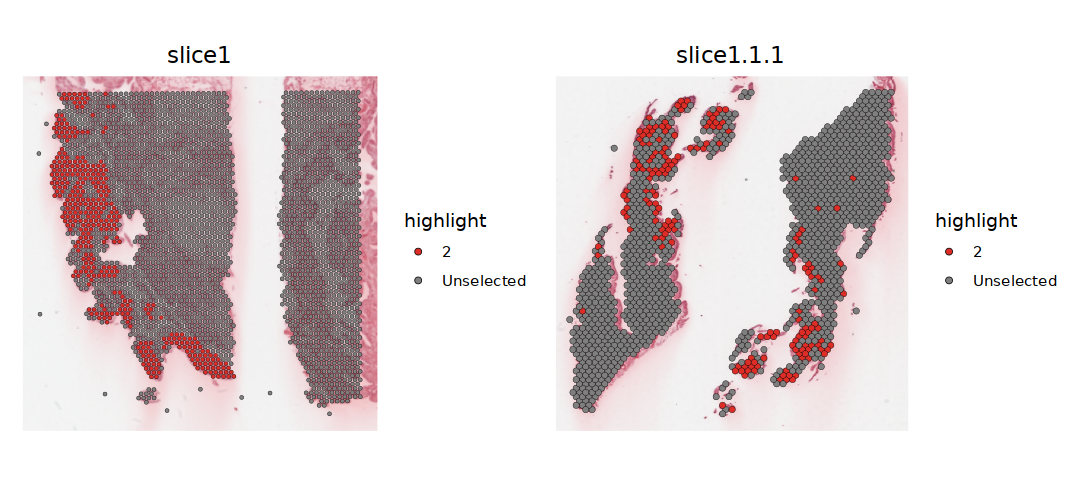

In [228]:
SpatialDimPlot(brain_in, cells.highlight = CellsByIdentities(object = brain_in, idents = c(2))) 

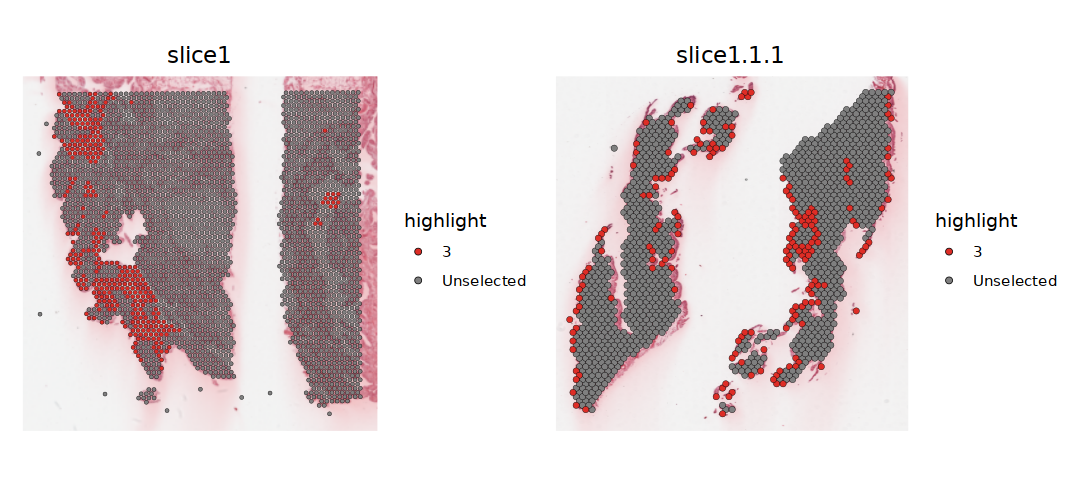

In [233]:
SpatialDimPlot(brain_in, cells.highlight = CellsByIdentities(object = brain_in, idents = c(3))) #, facet.highlight = TRUE, ncol = 5

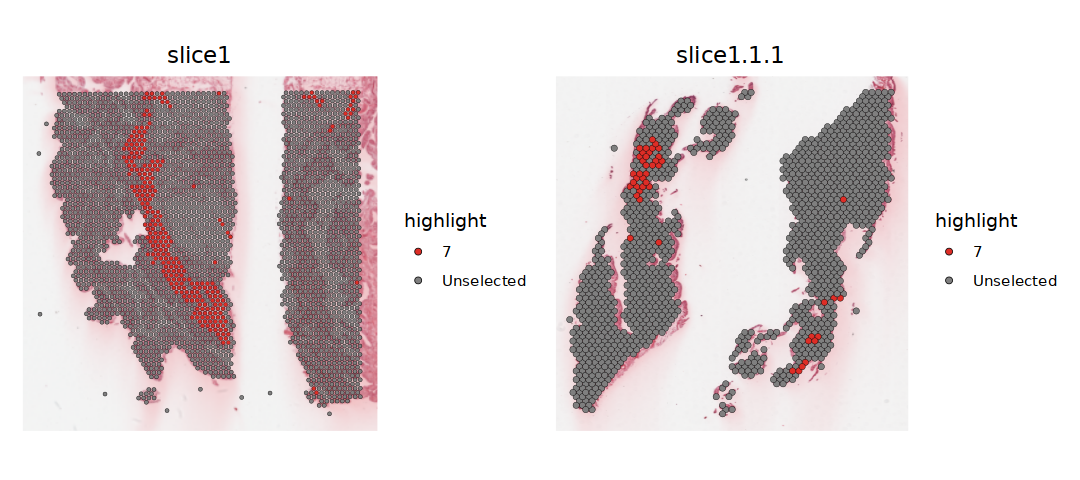

In [232]:
SpatialDimPlot(brain_in, cells.highlight = CellsByIdentities(object = brain_in, idents = c(7))) 

In [234]:
Idents(brain_in) = 'seurat_clusters'

In [267]:
SCE = brain_in

In [269]:
Idents(SCE) = 'seurat_clusters'
DefaultAssay(SCE) = 'integrated'
sce.markers <- FindAllMarkers(object = SCE, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [239]:
library(ggplot2)

In [264]:
options(repr.plot.height =12)

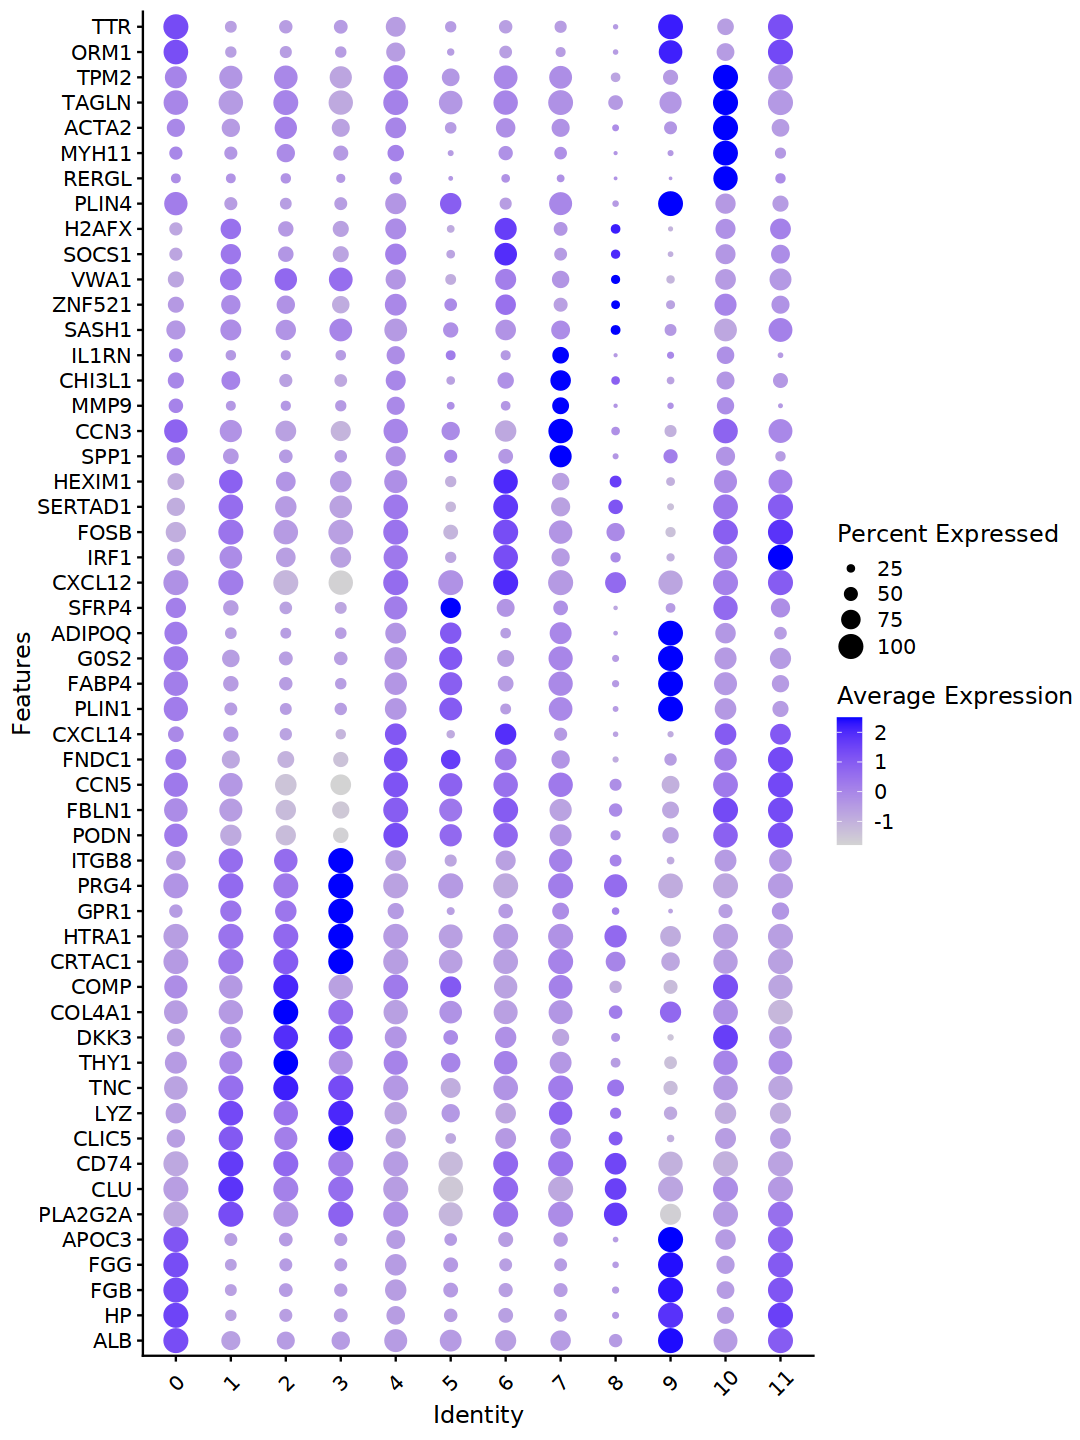

In [266]:
 DotPlot(SCE, features = unique(top5$gene) ,
 assay='integrated' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [242]:
saveRDS(SCE,file = 'SCE.rds')

In [158]:
getwd()

[1] "/import/hd"

In [258]:
options(repr.plot.height  = 6)

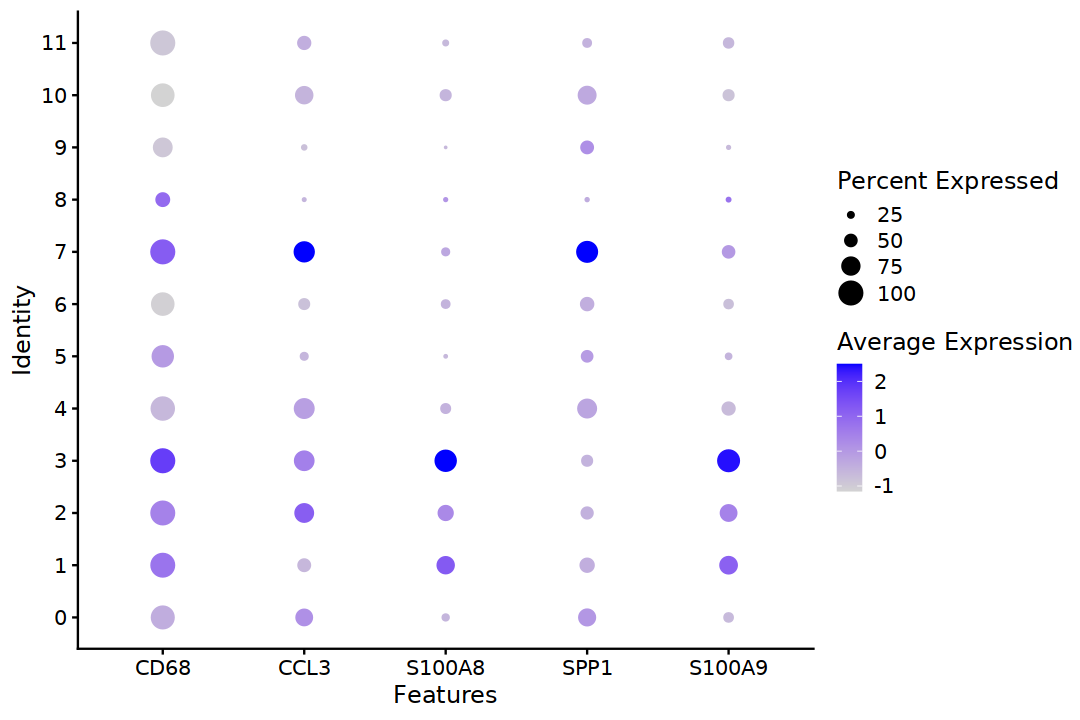

In [259]:
DotPlot(brain_in,features = c('CD68','CCL3','S100A8','SPP1','S100A9'))